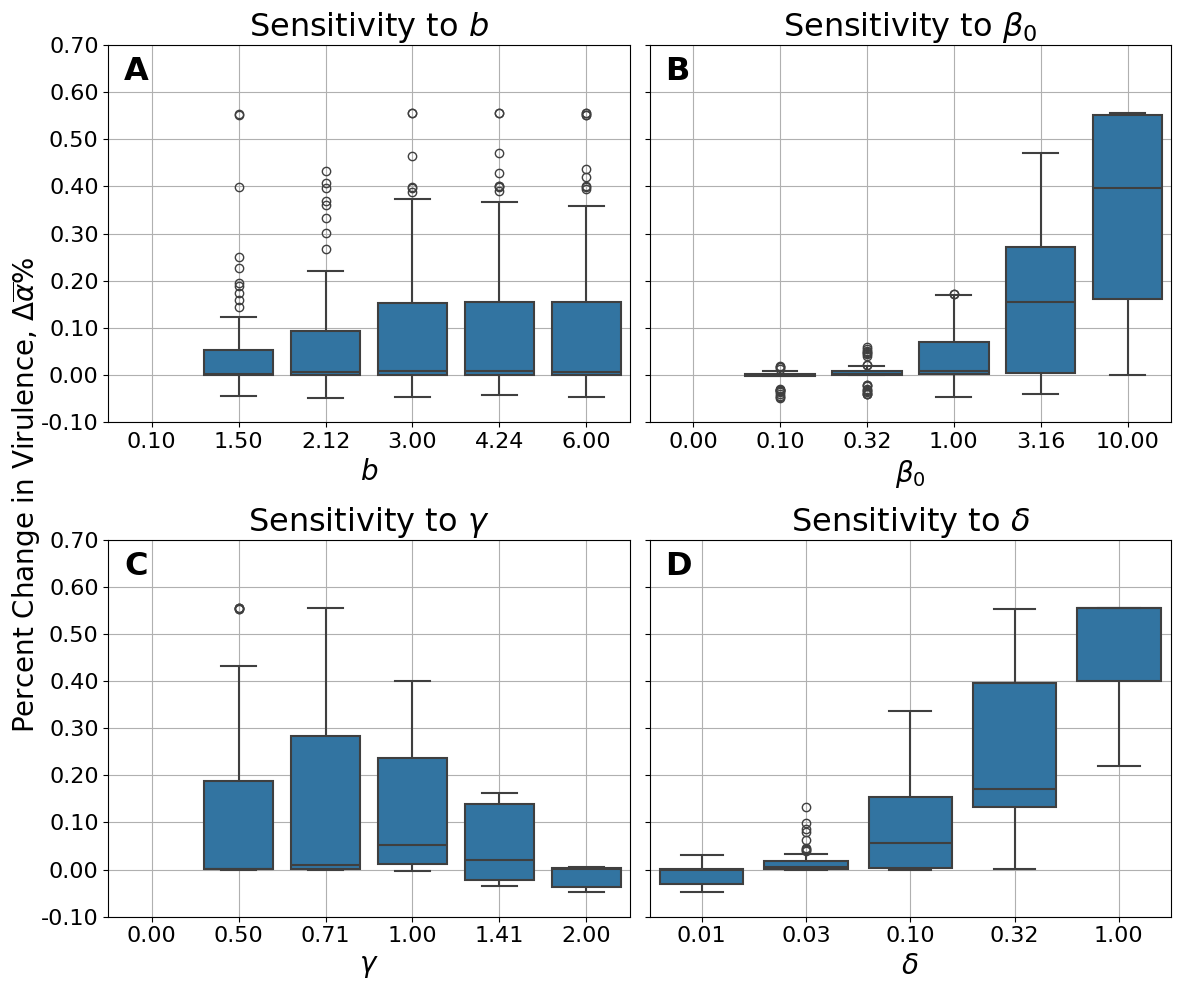

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns

df = pd.read_csv("param_sweep_parallel_2.csv")

df_clean = df[(df["mean_alpha_s0"] != 0) & (df["mean_alpha_s1"] != 0)].copy()
df_clean["meanPercDiff"] = ((df_clean["mean_alpha_s1"] - df_clean["mean_alpha_s0"]) / df_clean["mean_alpha_s0"])

for param in ["b", "beta0", "gamma", "delta"]:
    df_clean[param] = df_clean[param].round(5)

params  = ["b", "beta0", "gamma", "delta"]
labels  = [r"$b$", r"$\beta_0$", r"$\gamma$", r"$\delta$"]
pan_lbl = ["A", "B", "C", "D"]

fig, axes = plt.subplots(2, 2, figsize=(12, 10), sharey=True)

for idx, (ax, param, label) in enumerate(zip(axes.flat, params, labels)):
    sns.boxplot(ax=ax, x=param, y="meanPercDiff", data=df_clean, linewidth=1.5)

    ax.set_xlabel(label, fontsize=20)
    ax.set_title(f"Sensitivity to {label}", fontsize=23)
    ax.grid(True)

    ax.text(0.03, 0.97, pan_lbl[idx], transform=ax.transAxes, fontsize=23, fontweight="bold", ha="left", va="top")

    ax.set_ylim(-0.1, 0.7)
    ax.tick_params(axis='both', which='major', labelsize=16)
    ax.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.2f'))

    locs = ax.get_xticks()
    labels = [f'{float(lbl.get_text()):.2f}' for lbl in ax.get_xticklabels()]
    ax.xaxis.set_major_locator(mticker.FixedLocator(locs))
    ax.set_xticklabels(labels, fontsize=16)

    ax.set_ylabel('')

fig.supylabel(r'Percent Change in Virulence, $\Delta\overline{\alpha} \%$', fontsize=20)
plt.tight_layout()
plt.savefig("sensitivity_boxplots.png", dpi=500)
plt.show()
